#Fundamentos de Data Science

##Analizando la Rotación de Clientes en Telecomunicaciones, el objetivo es limpiar y explorar un dataset para los ejecutivos de una empresa de telecomunicaciones que describe tendencias en la rotación de sus clientes.

##Importar bibliotecas necesarias

In [ ]:
# Carga de de librerias y Dataset
import pandas as pd
import seaborn as sns
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn



##Mantener columnas relevantes como MonthlyCharges y TotalCharges:

La repetición en estas columnas podría reflejar grupos de clientes con patrones de pago similares, lo cual puede ser clave para tu análisis de rotación.

#Exploración inicial y carga de DataSets

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
# Imprime las primeras 5 filas del df
print("Pimeras 5 filas del DF")
df.head()

Pimeras 5 filas del DF


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Imprime información general del df
print("Informacion del DF")
print(df.info)

Informacion del DF
<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone servi

# 1- Limpieza de datos con Python:
Identificar y solucionar cualquier valor duplicado.

In [ ]:
# Imprime valores duplicados
print("Valores Duplicados:")
print(df.duplicated())

Valores Duplicados:
0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool


In [ ]:
# Verificacion si existen columnas duplicadas
duplicate_rows = df[df.duplicated()]
print(f"Número de columnas duplicadas: {len(duplicate_rows)}")

Número de columnas duplicadas: 0


In [ ]:
# Verificacion de valores duplicados por columna
for columna in df.columns:
    duplicados = df[columna].duplicated(keep=False).sum()
    print(f"La siguiente columna '{columna}' tiene {duplicados} valores duplicados.")


La siguiente columna 'customerID' tiene 0 valores duplicados.
La siguiente columna 'gender' tiene 7043 valores duplicados.
La siguiente columna 'SeniorCitizen' tiene 7043 valores duplicados.
La siguiente columna 'Partner' tiene 7043 valores duplicados.
La siguiente columna 'Dependents' tiene 7043 valores duplicados.
La siguiente columna 'tenure' tiene 7043 valores duplicados.
La siguiente columna 'PhoneService' tiene 7043 valores duplicados.
La siguiente columna 'MultipleLines' tiene 7043 valores duplicados.
La siguiente columna 'InternetService' tiene 7043 valores duplicados.
La siguiente columna 'OnlineSecurity' tiene 7043 valores duplicados.
La siguiente columna 'OnlineBackup' tiene 7043 valores duplicados.
La siguiente columna 'DeviceProtection' tiene 7043 valores duplicados.
La siguiente columna 'TechSupport' tiene 7043 valores duplicados.
La siguiente columna 'StreamingTV' tiene 7043 valores duplicados.
La siguiente columna 'StreamingMovies' tiene 7043 valores duplicados.
La sigu

#Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [ ]:
# Verificacion del tipo de dato que tiene cada columna
print("Tipos de datos")
print(df.dtypes)

Tipos de datos
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


# Considerando que la columna de "TotalCharges"(Cargos Totales), contiene como tipo de dato object, se cambiara a float64, por contener valores numericos y con decimales dentro del DF.

In [ ]:
# Imprime los valores unicos de TotalCharges
print("Valores unicos de 'TotalCharges'")
print(df['TotalCharges'].unique())

Valores unicos de 'TotalCharges'
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [ ]:
for col in ['TotalCharges']:
    # Reemplazar guiones por NaN para representar valores faltantes
    df[col] = df[col].replace('-', pd.NA)
    # Si no se puede convertir, se asignará un valor NaN (usando 'errors="coerce"')
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Covertir a tipo float64
    df[col] = df[col].astype('float64')
print("Tipos finales:\n", df.dtypes)

Tipos finales:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [ ]:
#Revisa si hubo filas afectadas por valores no válidos
nulos_totalcharges = df['TotalCharges'].isnull().sum()
print(f"Valores nulos en 'TotalCharges' después de la conversión: {nulos_totalcharges}")


Valores nulos en 'TotalCharges' después de la conversión: 11


In [ ]:
# Rellenar los valores nulos con la mediana
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

#Identificar y solucionar cualquier inconsistencia en los valores categóricos.

Se modifico los datos como por ejemplo "yes" y "no", en donde estos seran escritos con mayusculas y eliminando espacios para no tener ninguna inconsistencia

In [ ]:
# Identificar columnas categóricas
columnas_categoricas = df.select_dtypes(include='object').columns
print("Columnas categóricas:", columnas_categoricas)

# Ver valores únicos en las columnas con tipos de datos object
for columna in columnas_categoricas:
    print(f"Valores únicos en '{columna}': {df[columna].unique()}")


Columnas categóricas: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Valores únicos en 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Valores únicos en 'gender': ['Female' 'Male']
Valores únicos en 'Partner': ['Yes' 'No']
Valores únicos en 'Dependents': ['No' 'Yes']
Valores únicos en 'PhoneService': ['No' 'Yes']
Valores únicos en 'MultipleLines': ['No phone service' 'No' 'Yes']
Valores únicos en 'InternetService': ['DSL' 'Fiber optic' 'No']
Valores únicos en 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Valores únicos en 'OnlineBackup': ['Yes' 'No' 'No internet service']
Valores únicos en 'DeviceProtection': ['No' 'Yes' 'No internet service']
Valores únicos en 'TechS

In [ ]:
# Convertir todos los valores categóricos a mayusculas y eliminar espacios
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.upper().str.strip()

In [ ]:
# Verificacion despues del cambio de los valores categoricos
for columna in columnas_categoricas:
    print(f"Valores únicos en '{columna}': {df[columna].unique()}")

Valores únicos en 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Valores únicos en 'gender': ['FEMALE' 'MALE']
Valores únicos en 'Partner': ['YES' 'NO']
Valores únicos en 'Dependents': ['NO' 'YES']
Valores únicos en 'PhoneService': ['NO' 'YES']
Valores únicos en 'MultipleLines': ['NO PHONE SERVICE' 'NO' 'YES']
Valores únicos en 'InternetService': ['DSL' 'FIBER OPTIC' 'NO']
Valores únicos en 'OnlineSecurity': ['NO' 'YES' 'NO INTERNET SERVICE']
Valores únicos en 'OnlineBackup': ['YES' 'NO' 'NO INTERNET SERVICE']
Valores únicos en 'DeviceProtection': ['NO' 'YES' 'NO INTERNET SERVICE']
Valores únicos en 'TechSupport': ['NO' 'YES' 'NO INTERNET SERVICE']
Valores únicos en 'StreamingTV': ['NO' 'YES' 'NO INTERNET SERVICE']
Valores únicos en 'StreamingMovies': ['NO' 'YES' 'NO INTERNET SERVICE']
Valores únicos en 'Contract': ['MONTH-TO-MONTH' 'ONE YEAR' 'TWO YEAR']
Valores únicos en 'PaperlessBilling': ['YES' 'NO']
Valores únicos en 'PaymentMet

#Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.

In [ ]:
# Verificacion de valores nulos o faltantes
nulos = df.isnull().sum()
# Filtrar solo las columnas que tienen al menos un valor nulo
# y ordenarlas de mayor a menor cantidad de nulos
nulos = nulos[nulos > 0].sort_values(ascending=False)
print(nulos)

Series([], dtype: int64)


No se encontro valores faltantes en el Dataset mediante la verificacion realizada en el codigo anterior

#Identificar y solucionar cualquier punto de dato inapropiado o inusual

In [ ]:
# Identificar valores > 500 en columna de la antiguedad de los clientes
outliers = df[df['tenure'] > 500]
print(outliers)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [ ]:
# Identificar valores < 0 y, > 500 en columna de los cargos mensuales
outliers = df[(df['MonthlyCharges'] < 0) | (df['MonthlyCharges'] > 500)]
print(outliers)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [ ]:
# Identificar valores < 0 y, > 10000 en columna de los cargos totales
outliers_total = df[(df['TotalCharges'] < 0) | (df['TotalCharges'] > 10000)]
print(outliers_total)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


No se encontro ningun dato inapropiado en estas columnas numericas, que de por si, son valores importantes en el DF.

# 2- Exploración de datos:

El siguiente Histograma busca detectar tendencias sobre la duración del servicio, para observar si los clientes permanecen poco tiempo o por largos períodos.

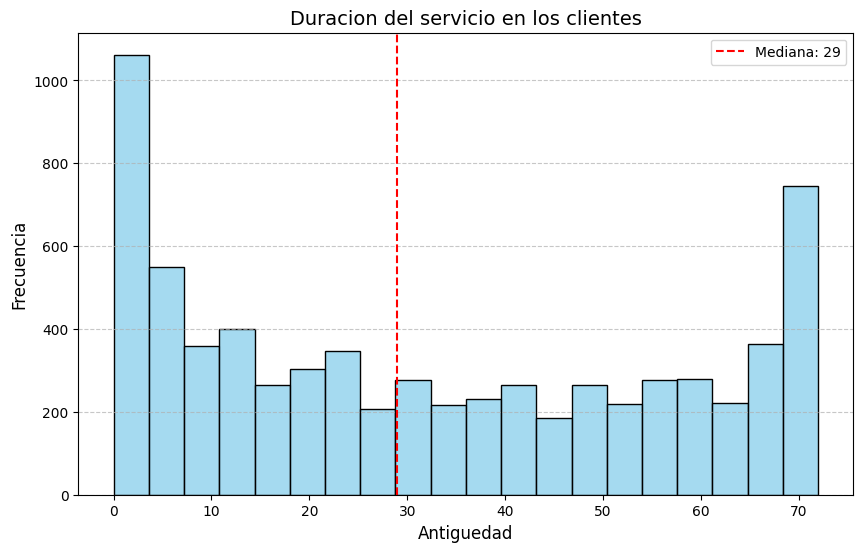

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para la columna 'tenure'

# Tamaño de la figura
plt.figure(figsize=(10, 6))
# Histograma, se especifica color y el numero de bins
sns.histplot(df['tenure'], bins=20, color='skyblue', edgecolor='black')
# Añade titulo
plt.title('Duracion del servicio en los clientes', fontsize=14)
# Se etiquetan los ejes x e y
plt.xlabel('Antiguedad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
# Se dibuja una línea vertical en la mediana de 'tenure'
plt.axvline(df['tenure'].median(), color='red', linestyle='--', label=f'Mediana: {df["tenure"].median():.0f}')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()
plt.show()

Como se puede observar la mayoría de los clientes tienen una duración de servicio muy corta, ya que la barra más alta está en la antigüedad 0. Y esta barra disminuye a medida que la antiguedad aumenta, asimismo los clientes bajan, y finalmente la mediana es 29 por lo tanto la mitad de los clientes tienen una antiguedad menor o igual a este numero.



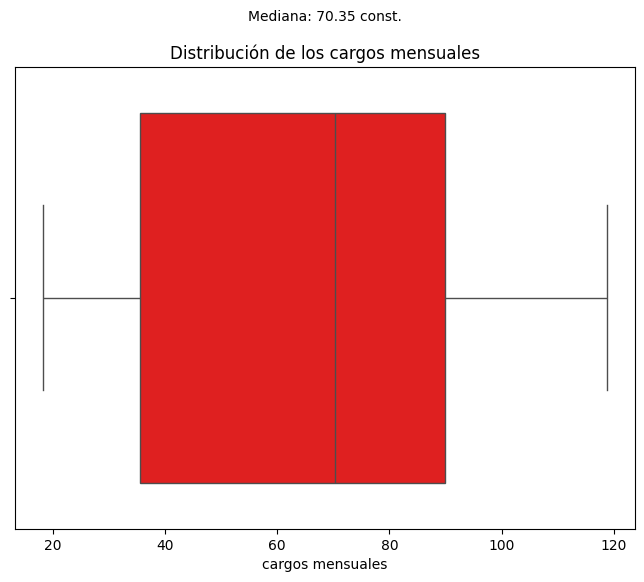

In [ ]:
# Tamaño de la figura
plt.figure(figsize=(8, 6))

# Creacion del boxplot y su color
sns.boxplot(x=df['MonthlyCharges'], color="red")
plt.title("Distribución de los cargos mensuales")
plt.xlabel("cargos mensuales")

# Se añade un texto que muestra la mediana del número de const.
plt.text(x=0.5, y=1.1,
         s=f"Mediana: {df['MonthlyCharges'].median()} const.",
         transform=plt.gca().transAxes,
         ha='center')
# Se identifican los outliers como aquellos valores que están por encima del límite superior del boxplot
outliers = df[df['MonthlyCharges'] > df['MonthlyCharges'].quantile(0.75) + 1.5 * (df['MonthlyCharges'].quantile(0.75) - df['MonthlyCharges'].quantile(0.25))]

# Si existen outliers, se mostraran como puntos negros
if not outliers.empty:
    plt.scatter(x=outliers['MonthlyCharges'], y=[0]*len(outliers), color='black', alpha=0.5)
plt.show()

En este grafico se puede observar que la mediana es 70.00 o un poco mas, lo que significa que la mitad de los clientes tienen cargos mensuales menores o iguales a este valor. Ademas la caja indica que, la mayoría de los datos están entre 40 y 100 aproximadamente, lo que muestra una variabilidad considerable en los cargos mensuales.

Y finalmente los bigotes del boxplot van desde 20 hasta 120, lo que sugiere que los cargos mensuales tienen una amplia dispersión.



## Visualizaciones exploratorias multivariadas:

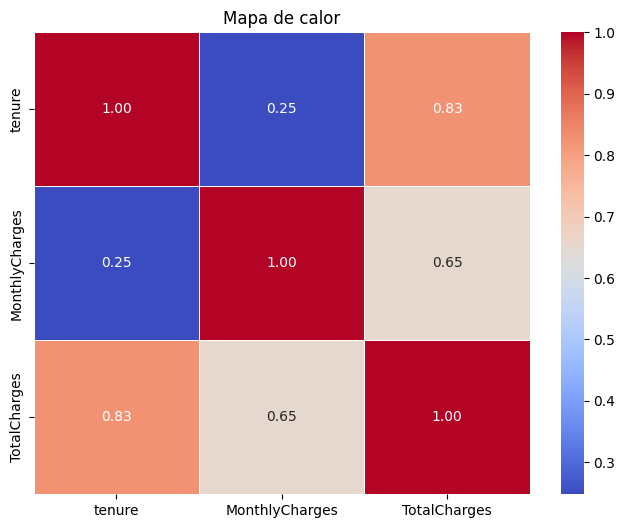

In [ ]:
# Seleccionar solo las variables numéricas
numeric_data = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

# Calcular la matriz de correlación
correlacion_matriz = numeric_data.corr()

# Crear el mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlacion_matriz, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor")
plt.show()


Existe una relacion fuerte entre tenure y TotalCharges, ya que cuanto mas tiempo ha estado un cliente en el servicio, mayor sera su total acumulado de pagos, esto puede concluir que los clientes que permanecen mas tiempo van a generar mas ingresos a lo largo del tiempo. Y asi mismo hay una correlacion baja entre tenure y MonthlyCharges (0.25), por lo tanto puede indicar que los clientes antiguos y nuevos tienen precios similares, sin grandes descuentos o cambios de tarifa con el tiempo.




MonthlyCharges vs. TotalCharges

Este grafico permitirá ver si los clientes con pagos mensuales más altos también tienen un total acumulado más altos, y para observar si hay clientes con muchos meses en el servicio pero con pagos relativamente bajos.

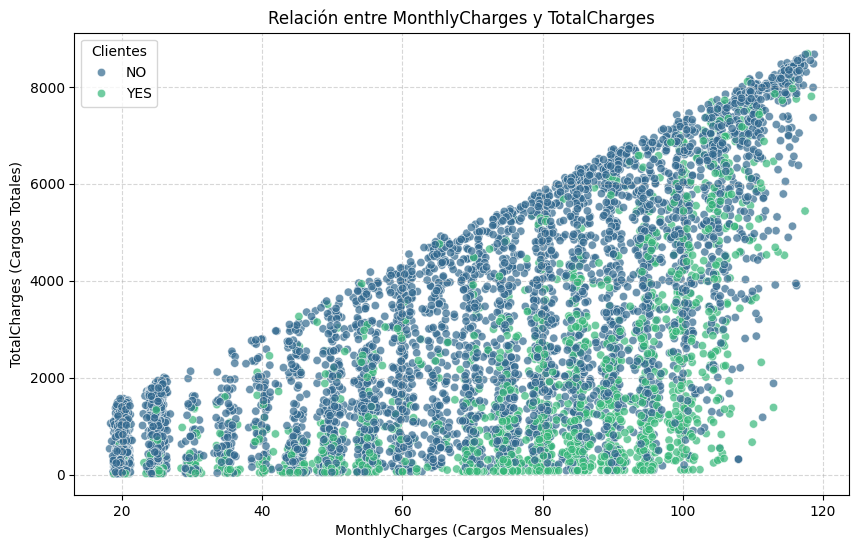

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=df["MonthlyCharges"], y=df["TotalCharges"], hue=df["Churn"], palette="viridis", alpha=0.7)

# Personalizar el gráfico
plt.title("Relación entre MonthlyCharges y TotalCharges")
plt.xlabel("MonthlyCharges (Cargos Mensuales)")
plt.ylabel("TotalCharges (Cargos Totales)")
plt.legend(title='Clientes')
plt.grid(alpha=0.5, linestyle='--')
plt.show()

Se puede concluir que en cuanto más paga un cliente por mes, mayor es su pago total acumulado, ademas los clientes con pagos totales más bajos tienden a cancelar con mayor frecuencia, lo que podría estar vinculado a contratos cortos o servicios más económicos.

Cabe destacar que los clientes con pagos mensuales más altos suelen quedarse más tiempo en el servicio.